## 1. Import required modules 

In [58]:
import pandas as pd 
import numpy as np 
from pandas_profiling import ProfileReport
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import statsmodels.api as sm 
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()



## 2. Data Analysis

In [59]:
df = pd.read_csv(r"C:\Users\manev\Desktop\iNeuron\dataset\Admission_Prediction.csv")

In [4]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


#### Columns Check 

In [6]:
df.describe() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [16]:
df.dtypes # Datatype check

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.isnull().sum() # Null Value Counts 

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

#### Data Analysis By Pandas Profiling

In [18]:
report = ProfileReport(df)
report.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df.corr() # Correlation Matrix

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.098792,-0.140218,-0.050560,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.098792,1.000000,0.835273,0.638159,0.616434,0.531996,0.829391,0.553755,0.810817
TOEFL Score,-0.140218,0.835273,1.000000,0.655072,0.647666,0.541949,0.810473,0.469540,0.792369
University Rating,-0.050560,0.638159,0.655072,1.000000,0.723497,0.611437,0.706012,0.431253,0.690195
SOP,-0.137352,0.616434,0.647666,0.723497,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.531996,0.541949,0.611437,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.829391,0.810473,0.706012,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.553755,0.469540,0.431253,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810817,0.792369,0.690195,0.684137,0.645365,0.882413,0.545871,1.000000


F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

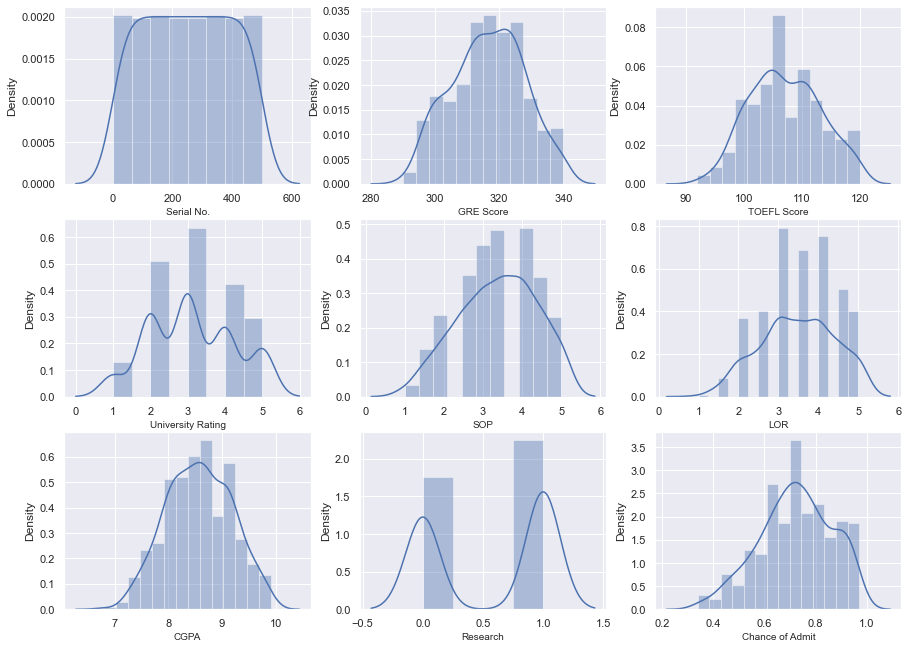

In [45]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(df[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

#### Checking Outliers

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

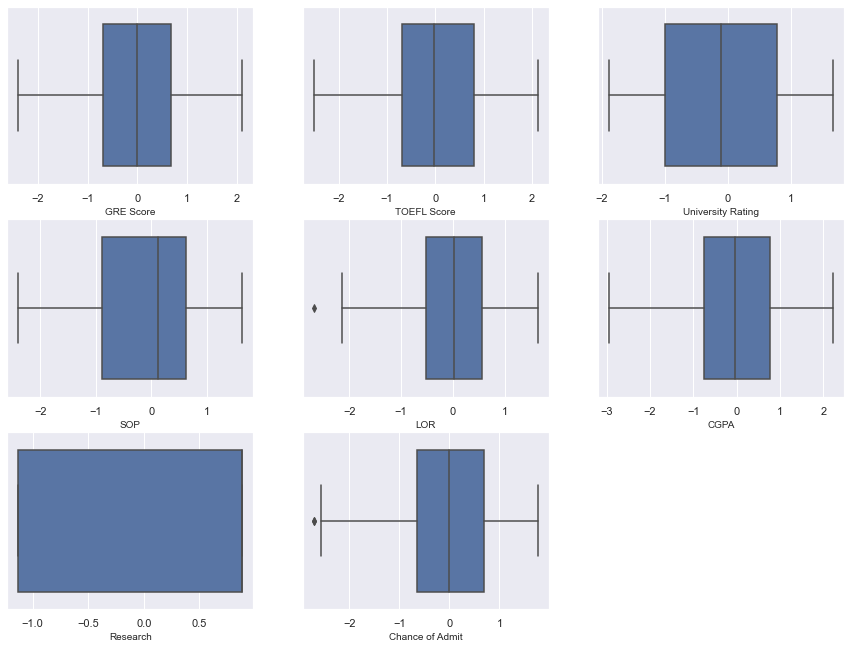

In [56]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in df.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((df[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

#### Heatmap

<AxesSubplot:>

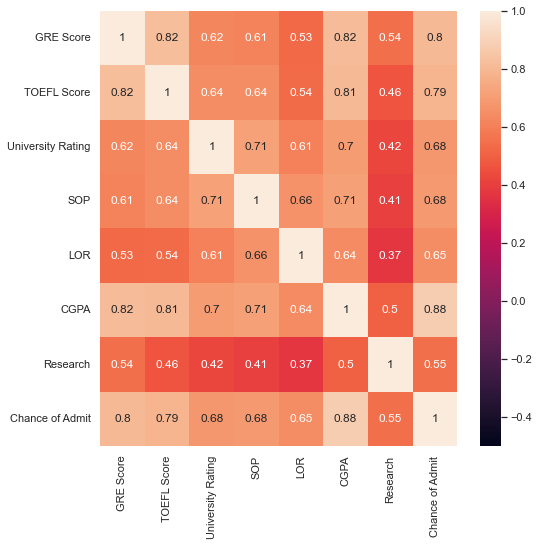

In [57]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(df.corr().abs(), vmin = -0.5,vmax = 1,annot=True) 


#### Removing Null Values 

In [60]:
df["TOEFL Score"] = df["TOEFL Score"].fillna(df["TOEFL Score"].mean())
df["University Rating"] = df["University Rating"].fillna(df["University Rating"].mean()) 
df["GRE Score"] = df["GRE Score"].fillna(df["GRE Score"].mean())
df.drop(columns=["Serial No."],inplace=True)

#### Summary of Outliers 

In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
((df > upper_limit) | (df < lower_limit)).sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64

#### Standard Scaling / Normalizing(mean=0 and std =1 ) 

In [53]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df) , columns=df.columns)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405,1.406107
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405,0.271349
2,7.402844e-16,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797


#### VIF - if VIF > 10 then there is high Multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_vif = pd.DataFrame()
df_vif["FEATURES"] = df.columns
df_vif["VIF"] = [variance_inflation_factor(df,i) for i in range(df.shape[1])]
df_vif

,FEATURES,VIF
0,GRE Score,4.261199
1,TOEFL Score,3.869258
2,University Rating,2.518179
3,SOP,2.777084
4,LOR,2.103561
5,CGPA,6.157682
6,Research,1.505263
7,Chance of Admit,5.576761
